In [14]:
import numpy as np
import pandas as pd
import itertools
import random
import string
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm
import copy
import multiprocess



In [8]:
def create_kauffman_network (n, t, p, k = 2):
    # Set of Molecules
    X = []
    F = []
    alphabet = string.ascii_uppercase[0:k]
    for i in range(1, n+1):    
        vals = [''.join(m) for m in itertools.product(alphabet, repeat=i)]
        X = X + vals
        if i <= t:
            F = F + vals
    #print(X)
    #print(F)

    # Reaction (pair of molecules)
    R = {}
    react_count = 1
    for i in range(len(X)):
        cand = X[i] + X[i]
        if len(cand) <= n:
            R[react_count] = [[X[i], X[i]], [cand]]
            react_count +=1
            #Lysis Reaction
            R[react_count] = [[cand],[X[i], X[i]]]
            react_count +=1

        for j in range(i+1, len(X)):
            cand1 = X[i] + X[j]
            cand2 = X[j] + X[i]
            if len(cand1) <= n:
                if cand2 != cand1:
                    #print(list(R.values()))
                    if [[X[j], X[i]], [cand1]] not in list(R.values()):
                        R[react_count] = [[X[i], X[j]], [cand1]]
                        react_count +=1
                    
                    if [[cand1],[X[j], X[i]]] not in list(R.values()):
                        R[react_count] = [[cand1],[X[i], X[j]]]
                        react_count +=1
                    
                    if [[X[i], X[j]], [cand2]] not in list(R.values()):
                        R[react_count] = [[X[j], X[i]], [cand2]]
                        react_count +=1
                    
                    if [[cand2],[X[i], X[j]]] not in list(R.values()):
                        R[react_count] = [[cand2],[X[j], X[i]]]
                        react_count +=1
                else:
                    if [[X[j], X[i]], [cand1]] not in list(R.values()):
                        R[react_count] = [[X[i], X[j]], [cand1]]
                        react_count +=1
                    

                    if [[cand1],[X[j], X[i]]] not in list(R.values()):
                        R[react_count] = [[cand1],[X[i], X[j]]]
                        react_count +=1

                   

    C = {}
    for i in X:
        for j in range(1, react_count):
            if np.random.random(1)[0] < p:
                if j%2 == 1:
                    k = 1
                else:
                    k = -1

                if j in C.keys():
                    if i not in C[j]:
                        C[j].append(i)
                else:
                    C[j]= [i]

                if j+k in C.keys():
                    if i not in C[j+k]:
                        C[j+k].append(i)
                else:
                    C[j+k]= [i]
    
    
                

    return (X, F, R, C)

In [9]:
def len_R (n, k = 2):
    # Set of Molecules
    X = []
    alphabet = string.ascii_uppercase[0:k]
    for i in range(1, n+1):    
        vals = [''.join(m) for m in itertools.product(alphabet, repeat=i)]
        X = X + vals
        
    #print(X)
    #print(F)

    # Reaction (pair of molecules)
    R = {}
    react_count = 1
    for i in range(len(X)):
        cand = X[i] + X[i]
        if len(cand) <= n:
            R[react_count] = [[X[i], X[i]], [cand]]
            react_count +=1
            #Lysis Reaction
            R[react_count] = [[cand],[X[i], X[i]]]
            react_count +=1

        for j in range(i+1, len(X)):
            cand1 = X[i] + X[j]
            cand2 = X[j] + X[i]
            if len(cand1) <= n:
                if cand2 != cand1:
                    #print(list(R.values()))
                    if [[X[j], X[i]], [cand1]] not in list(R.values()):
                        R[react_count] = [[X[i], X[j]], [cand1]]
                        react_count +=1
                    
                    if [[cand1],[X[j], X[i]]] not in list(R.values()):
                        R[react_count] = [[cand1],[X[i], X[j]]]
                        react_count +=1
                    
                    if [[X[i], X[j]], [cand2]] not in list(R.values()):
                        R[react_count] = [[X[j], X[i]], [cand2]]
                        react_count +=1
                    
                    if [[cand2],[X[i], X[j]]] not in list(R.values()):
                        R[react_count] = [[cand2],[X[j], X[i]]]
                        react_count +=1
                else:
                    if [[X[j], X[i]], [cand1]] not in list(R.values()):
                        R[react_count] = [[X[i], X[j]], [cand1]]
                        react_count +=1
                    

                    if [[cand1],[X[j], X[i]]] not in list(R.values()):
                        R[react_count] = [[cand1],[X[i], X[j]]]
                        react_count +=1
    return react_count -1

In [16]:
len_R(10)

32668

In [10]:
def create_catalysts (X, react_count, p):
    C = {}
    for i in X:
        for j in range(1, react_count):
            if np.random.random(1)[0] < p:
                if j%2 == 1:
                    k = 1
                else:
                    k = -1

                if j in C.keys():
                    if i not in C[j]:
                        C[j].append(i)
                else:
                    C[j]= [i]

                if j+k in C.keys():
                    if i not in C[j+k]:
                        C[j+k].append(i)
                else:
                    C[j+k]= [i]
                
    return (C)

In [11]:
def graph (X, F, R, C):
    DG = nx.MultiDiGraph()

    for node in X:
   
        if node in F:
            DG.add_node(node, ncolor = "orange")
           
        else:
            DG.add_node(node, ncolor = 'lawngreen')
        

    for node in R: 
        text = "R{}".format(node)
        DG.add_node(text, ncolor = 'salmon')
    

        for i in range(len(R[node][0])):
            DG.add_edge(R[node][0][i], text, color = "steelblue")
        
        for i in range(len(R[node][1])):
            DG.add_edge(text,R[node][1][i], color ="steelblue")
  

    for j in C:
        for k in C[j]:
            if k in X and j in list(R.keys()):
                text = "R{}".format(j)
                DG.add_edge(k, text, color ="fuchsia")




    edge_colors = []

    for (u,v,attrib_dict) in list(DG.edges.data()):
        edge_colors.append(attrib_dict['color'])
    
    node_colors = list(nx.get_node_attributes(DG, "ncolor").values())
    
 


    nx.draw(DG, node_color= node_colors, edge_color = edge_colors, with_labels=True, font_weight='bold', node_size = 750, pos=nx.circular_layout(DG), connectionstyle='arc3, rad = 0.1')
    
    plt.show()

In [12]:
def create_XFR(n, t = 2,k = 2):
    if n ==2:
        t = 1

    X = []
    F = []
    alphabet = string.ascii_uppercase[0:k]
    for i in range(1, n+1):    
        vals = [''.join(m) for m in itertools.product(alphabet, repeat=i)]
        X = X + vals
        if i <= t:
            F = F + vals
    
    R = {}
    react_count = 1
    for i in range(len(X)):
        cand = X[i] + X[i]
        if len(cand) <= n:
            R[react_count] = [[X[i], X[i]], [cand]]
            react_count +=1
            #Lysis Reaction
            R[react_count] = [[cand],[X[i], X[i]]]
            react_count +=1

        for j in range(i+1, len(X)):
            cand1 = X[i] + X[j]
            cand2 = X[j] + X[i]
            if len(cand1) <= n:
                if cand2 != cand1:
                    #print(list(R.values()))
                    if [[X[j], X[i]], [cand1]] not in list(R.values()):
                        R[react_count] = [[X[i], X[j]], [cand1]]
                        react_count +=1
                    
                    if [[cand1],[X[j], X[i]]] not in list(R.values()):
                        R[react_count] = [[cand1],[X[i], X[j]]]
                        react_count +=1
                    
                    if [[X[i], X[j]], [cand2]] not in list(R.values()):
                        R[react_count] = [[X[j], X[i]], [cand2]]
                        react_count +=1
                    
                    if [[cand2],[X[i], X[j]]] not in list(R.values()):
                        R[react_count] = [[cand2],[X[j], X[i]]]
                        react_count +=1
                else:
                    if [[X[j], X[i]], [cand1]] not in list(R.values()):
                        R[react_count] = [[X[i], X[j]], [cand1]]
                        react_count +=1
                    

                    if [[cand1],[X[j], X[i]]] not in list(R.values()):
                        R[react_count] = [[cand1],[X[i], X[j]]]
                        react_count +=1
    
    return(X,F, R)

## RAF Algorithm

In [1]:
# Find all possible molecules able to be produced by the food set and available reactions

def closure(F, R):
    no_change = 0
    X = list(F)

    while no_change !=1:
        no_change = 1

        for i in list(R.values()):
            sufficient = 1
            for j in i[0]:
                if j not in X:
                    sufficient = 0
            if sufficient == 1:
                for k in i[1]:
                    if k not in X:
                        X.append(k)
                        no_change = 0
    return(X)
            


In [2]:
def Rsupp (R):
    supp = []
    for i in list(R.values()):
        cands = i[0] + i[1]
        for j in cands:
            if j not in supp:
                supp.append(j)
    return(supp)


In [3]:
def reduceR(R, C):

    catalyzed = list(C.keys())
    uncat_R = list(set(R.keys()) - set(catalyzed))


    for i in uncat_R:
        del R[i]
    
    
    no_change = 0
    while no_change != 1:
        no_change = 1

        suppR= Rsupp(R)
        Rs = list(C.keys())

        for i in Rs:
            for j in C[i]:
                if j not in suppR:
                    C[i] = C[i].remove(j)
                
                if not C[i]:
                    # print("DELETE")
                    del C[i]
                    if i in R:
                        del R[i]
                    no_change = 0
                    break
         
    return(R,C)
            

In [4]:
def reduceToF(F, R):
    W = closure(F,R)
    r_num= list(R.keys())
    
    for i in r_num:
        remove = 0
        for j in R[i][0]:
            if j not in W:
                remove = 1
                break
        if remove == 1:
            del R[i]

    
    return R

In [26]:
def RAF(X,F,R,C):
    X_old = X.copy()
    R_old = copy.deepcopy(R)

    i = 0 
    change = 0
    while change != 1:
        R, C = reduceR(R, C)
        X = closure(F,R)
        R = reduceToF(F,R)
        i= i+1

        if R != False and X != False:
            if X_old == X and R_old == R:
                change = 1
            else:
                R_old = copy.deepcopy(R)
                X_old = X.copy()
        else:
            break
    
    if not R:
        return 0
    else:
        return 1

In [115]:
def bad_RAF(X,F,R,C):
    X_prev = X.copy()
    R_prev = copy.deepcopy(R)
    C_prev = copy.deepcopy(C)
    if not C:
        return 0
    
    i = 0 
    change = 0
    while change != 1:
        R_new, C_new = reduceR(copy.deepcopy(R_prev), copy.deepcopy(C_prev))
        X_new = closure(F,R_new)
        R_new = reduceToF(F,R_new)
        i= i+1

        if R_new != False and X_new != False:
            if X_prev == X_new and R_prev == R_new:
                change = 1
            else:
                R_prev = copy.deepcopy(R_new)
                X_prev = X_new.copy()
                C_prev= copy.deepcopy(C_new)
        else:
            break
    
    if not R_prev or not X_prev or not C_prev:
            return 0 #, X_new
    
    else:
        return 1 


In [81]:
n = 2
t = 1
X,F,R = create_XFR(n, t)
p = 0.25/len(R)
C = create_catalysts(X, len(R),p)

print(X)
print(R)
print(C)
print("")

bad_RAF(X.copy(), F.copy(), R.copy(), C)

['A', 'B', 'AA', 'AB', 'BA', 'BB']
{1: [['A', 'A'], ['AA']], 2: [['AA'], ['A', 'A']], 3: [['A', 'B'], ['AB']], 4: [['AB'], ['A', 'B']], 5: [['B', 'A'], ['BA']], 6: [['BA'], ['B', 'A']], 7: [['B', 'B'], ['BB']], 8: [['BB'], ['B', 'B']]}
{3: ['AA', 'AB'], 4: ['AA', 'AB']}



0

## Simulation

In [116]:
f_min = 0.35
f_max = 0.35
pcount= 1
reps = 100
n = 3
t = 2



In [128]:
X,F,R = create_XFR(n, t)
p_min = f_min /len(R)
p_max = f_max /len(R)
ps = np.linspace(p_min, p_max, pcount)
print(ps)
print("--")

Cs = []
RAFs = []
for p in ps: 
    for j in range(reps):
        C = create_catalysts(X, len(R),p)
        Cs.append(C)
        RAFs.append(bad_RAF(X, F, R, C))


sum(RAFs)/(pcount * reps)


[0.00972222]
--


0.63

In [ ]:
success= [i  for i in range(pcount * reps) if RAFs[i] == 1]
rand_success = random.sample(success,5)
for i in rand_success:
    print(len(Cs[i]))
    graph(X,F,R,Cs[i])

In [19]:
def add_catalyst(X, R, C):
    add_new = 0
    while add_new == 0:
        reaction = random.sample(list(R.keys()),1)[0]
        if reaction %2 == 1:
            k = 1
        else:
            k = -1
        catalyst = random.sample(X,1)[0]
        
        if reaction in C:
            if catalyst not in C[reaction]:
                C[reaction].append(catalyst)
                C[reaction + k].append(catalyst)
                add_new = 1

        else:
            C[reaction] = [catalyst]
            C[reaction+k] = [catalyst]
            add_new = 1
    return(C)



In [18]:
def remove_catalyst(C):
    reaction = random.sample(list(C), 1)[0]
    if reaction %2 == 1:
        k = 1
    else:
        k = -1
    
    if len(C[reaction]) == 1:
        del C[reaction]
        del C[reaction+ k]
  
    else:
      
        catalyst = random.sample(C[reaction], 1)[0]
        
        C[reaction].remove(catalyst)
        
        C[reaction+k].remove(catalyst)
       
    return(C)

In [49]:
def stability_test (N, f, n, t):
    success_stability = 0
    failure_stability = 0
    RAFs = 0


    for j in range(N):
        X,F,R = create_XFR(n, t)
        p = f/len(R)
        C = create_catalysts(X, len(R),p)
        

        raf = RAF(X.copy(), F.copy(), R.copy(), C)
        RAFs += raf
        if raf == 1:
            #print("C:{}".format(C))
            new_C = remove_catalyst(C)
            #print("New C:{}".format(new_C))
            if new_C:
                success_stability += RAF(X.copy(),F.copy(),R.copy(),new_C)
        else:
           
            #print("R:{}".format(R))
            new_C = add_catalyst(X.copy(),R.copy(), C)
            failure_stability += RAF(X,F,R,new_C)

    print("{} Trials of n = {} at f = {}".format(N, n, f))
    print("----------------------")
    print("Percentage RAF: {}".format(RAFs/N))
    print("Percentage RAF after perturbation of Stable: {}".format(success_stability/RAFs))
    print("Percentage RAF after perturbation Unstable: {}".format(failure_stability/(N-RAFs)))

    return
    
    

        


In [50]:
stability_test(10,0.5, 2, 1)

10 Trials of n = 2 at f = 0.5
----------------------
Percentage RAF: 0.4
Percentage RAF after perturbation of Stable: 0.5
Percentage RAF after perturbation Unstable: 0.6666666666666666


In [51]:
failure = [i  for i in range(pcount*reps) if RAFs[i] == 0]

rand_failure = random.sample(failure, 5)
for i in rand_failure:
        #print(len(Cs[i]))
    graph(X,F,R,Cs[i])

NameError: name 'pcount' is not defined

In [52]:
failure_len = [len(Cs[i])  for i in range(pcount*reps) if RAFs[i] == 0]
sum(failure_len)

NameError: name 'pcount' is not defined

## Food Stability

In [16]:
def remove_catalystF(C, F):
  
    food_catalysts = list(set(np.unique([num for sublist in list(C.values()) for num in sublist])) & set(F))
   
    if len(food_catalysts) > 0:
        catalyst = random.sample(food_catalysts, 1)[0]

        for i in list(C.keys()):
            
            if catalyst in C[i]:
                if i %2 == 1:
                    k = 1
                else:
                    k = -1

                if len(C[i]) > 1:
                    C[i].remove(catalyst)
                    C[i+k].remove(catalyst)
                else:
                    del C[i]
                    del C[i+k]
                
                break

    return C

In [15]:
def add_catalystF(F, R, C):
    add_new = 0
    while add_new == 0:
        reaction = random.sample(list(R.keys()),1)[0]
        if reaction %2 == 1:
            k = 1
        else:
            k = -1
        catalyst = random.sample(F,1)[0]
        
        if reaction in C:
            if catalyst not in C[reaction]:
                C[reaction].append(catalyst)
                C[reaction + k].append(catalyst)
                add_new = 1

        else:
            C[reaction] = [catalyst]
            C[reaction+k] = [catalyst]
            add_new = 1
    return(C)



In [ ]:
N = 1000
n = 2
t = 1
f= 0.35

In [ ]:

success_stability = 0
failure_stability = 0
RAFs = 0


for j in range(N):
    X,F,R = create_XFR(n, t)
    p = f/len(R)
    C = create_catalysts(X, len(R),p)
        

    raf = RAF(X.copy(), F.copy(), R.copy(), C)
    RAFs += raf
    if raf == 1:
            #print("C:{}".format(C))
        new_C = remove_catalystF(C,F)
            #print("New C:{}".format(new_C))
        if new_C:
            success_stability += RAF(X.copy(),F.copy(),R.copy(),new_C)
    else:
           
            #print("R:{}".format(R))
        new_C = add_catalystF(F.copy(),R.copy(), C)
        failure_stability += RAF(X,F,R,new_C)

print("{} Trials of n = {} at f = {}".format(N, n, f))
print("----------------------")
print("Percentage RAF: {}".format(RAFs/N))
print("Percentage RAF after Food Perturbation of Stable: {}".format(success_stability/RAFs))
print("Percentage RAF after Food Perturbation of Unstable: {}".format(failure_stability/(N-RAFs)))
print("")

In [ ]:
success_stability

In [ ]:
X,F,R,C = create_kauffman_network(2, 1,0)
graph(X,F,R,C)

In [ ]:
R

## Stability Count

In [53]:
def stability_count (N, f, n, t=2):
    succ_counts = []
    fail_counts = []
    RAFs = 0

    if n == 2:
        t = 1

    for j in range(N):
        X,F,R = create_XFR(n, t)
        p = f/len(R)
        C = create_catalysts(X, len(R),p)
        print(j)
        print("----")

        raf = RAF(X.copy(), F.copy(), R.copy(), C)
        RAFs += raf
        count = 0
        if raf == 1:
            graph(X,F,R,C)
            while raf == 1:
                if C:
                    new_C = remove_catalyst(C)
                else:
                    count += 1
                    break
                if new_C:
                    C = new_C
                    raf = RAF(X.copy(),F.copy(),R.copy(),new_C)
                else:
                
                    count += 1
                    break
                count += 1
            print("Count: {}".format(count))
            print(C)
            graph(X,F,R,C)
            succ_counts.append(count)
        
        else:
            graph(X,F,R,C)
            while raf ==0:
                print("RAF: {}".format(raf))
                print("Count: {}".format(count))
                
                new_C = add_catalyst(X.copy(),R.copy(), C)
                print(new_C)
                C = copy.deepcopy(new_C)
                raf = RAF(X.copy(),F.copy(),R.copy(),new_C)
                
                count += 1
                print(C)
                print("yeet")
            #print(C)
            graph(X,F,R,C)
            fail_counts.append(count)

    print("{} Trials of n = {} at f = {}".format(N, n, f))
    print("----------------------")
    print("Percentage RAF: {}".format(RAFs/N))
    print("Average Perturbations to Disrupt RAF: {}".format(np.mean(succ_counts)))
    print("Standard Deviation of Perturbations to Disrupt RAF: {}".format(np.std(succ_counts)))
    print("Average Perturbations to Produce RAF: {}".format(np.mean(fail_counts)))
    print("Standard Deviation of Perturbations to Produce RAF: {}".format(np.std(fail_counts)))

    print("")

    return succ_counts, fail_counts

0
----


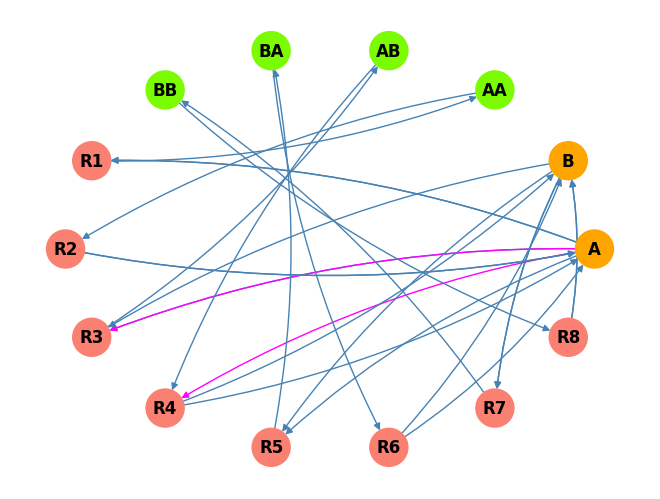

Count: 1
{}


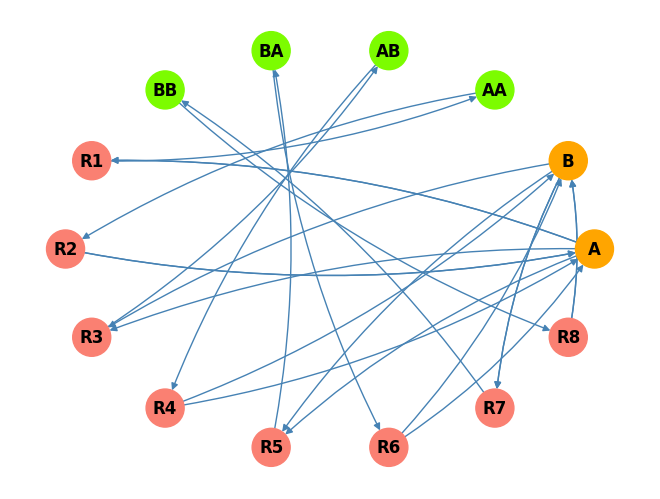

1
----


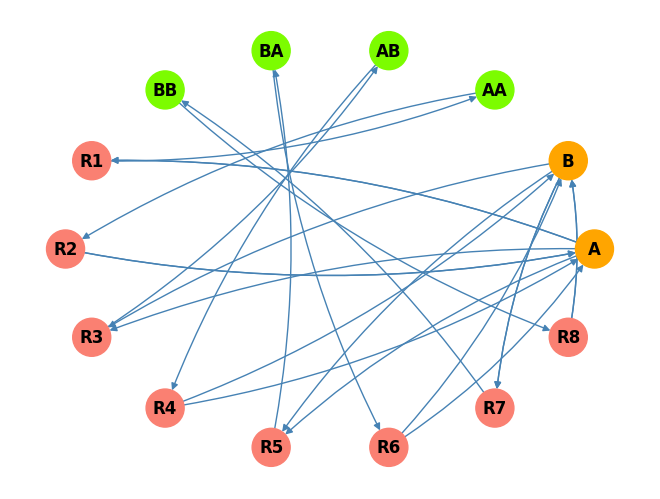

RAF: 0
Count: 0
{4: ['BB'], 3: ['BB']}
{4: ['BB'], 3: ['BB']}
yeet
RAF: 0
Count: 1
{4: ['BB'], 3: ['BB'], 1: ['AB'], 2: ['AB']}
{4: ['BB'], 3: ['BB'], 1: ['AB'], 2: ['AB']}
yeet
RAF: 0
Count: 2
{4: ['BB'], 3: ['BB'], 1: ['AB'], 2: ['AB'], 6: ['BA'], 5: ['BA']}
{4: ['BB'], 3: ['BB'], 1: ['AB'], 2: ['AB'], 6: ['BA'], 5: ['BA']}
yeet


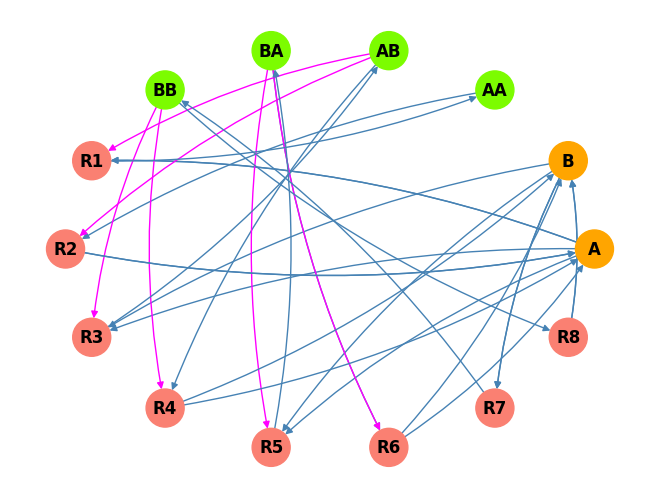

2
----


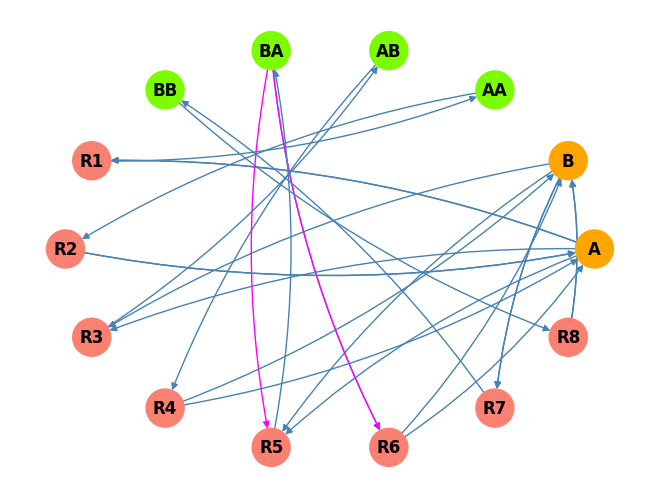

Count: 1
{}


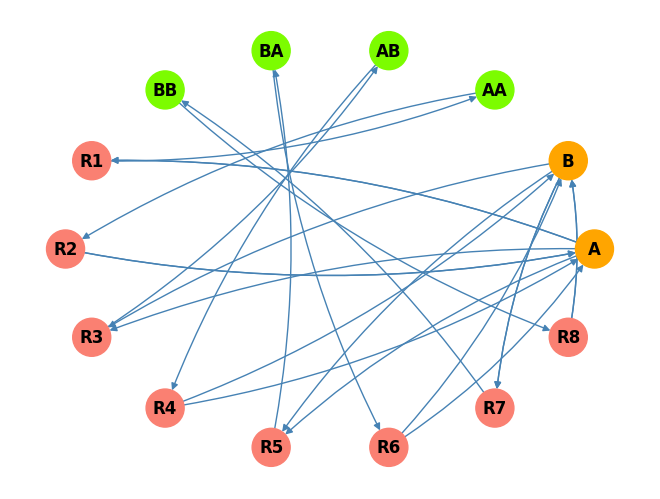

3
----


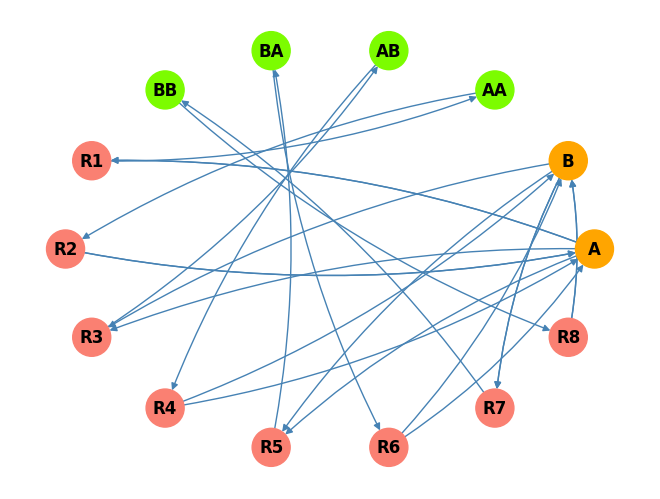

RAF: 0
Count: 0
{3: ['BA'], 4: ['BA']}
{3: ['BA'], 4: ['BA']}
yeet
RAF: 0
Count: 1
{3: ['BA'], 4: ['BA'], 1: ['AB'], 2: ['AB']}
{3: ['BA'], 4: ['BA'], 1: ['AB'], 2: ['AB']}
yeet
RAF: 0
Count: 2
{3: ['BA'], 4: ['BA'], 1: ['AB'], 2: ['AB'], 5: ['AB'], 6: ['AB']}
{3: ['BA'], 4: ['BA'], 1: ['AB'], 2: ['AB'], 5: ['AB'], 6: ['AB']}
yeet


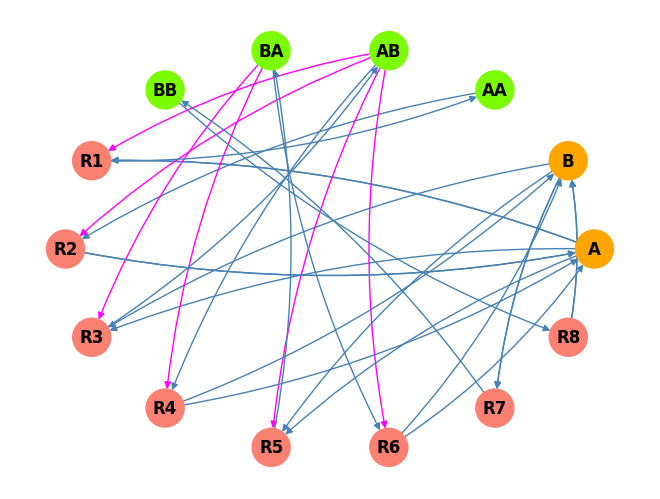

4
----


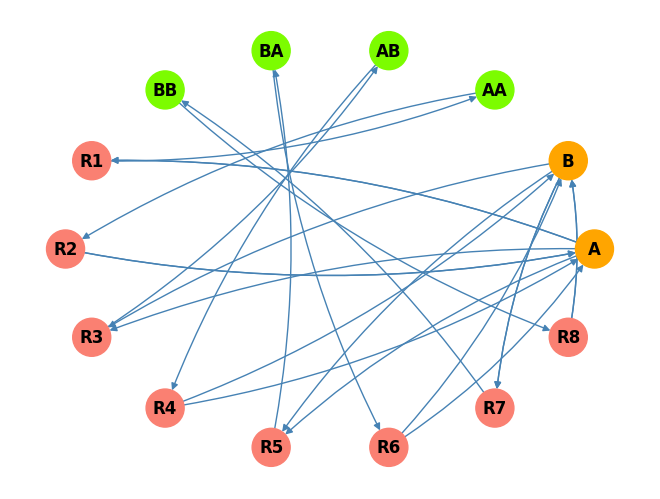

RAF: 0
Count: 0
{8: ['AB'], 7: ['AB']}
{8: ['AB'], 7: ['AB']}
yeet
RAF: 0
Count: 1
{8: ['AB'], 7: ['AB'], 5: ['AB'], 6: ['AB']}
{8: ['AB'], 7: ['AB'], 5: ['AB'], 6: ['AB']}
yeet
RAF: 0
Count: 2
{8: ['AB'], 7: ['AB'], 5: ['AB'], 6: ['AB'], 4: ['BB'], 3: ['BB']}
{8: ['AB'], 7: ['AB'], 5: ['AB'], 6: ['AB'], 4: ['BB'], 3: ['BB']}
yeet


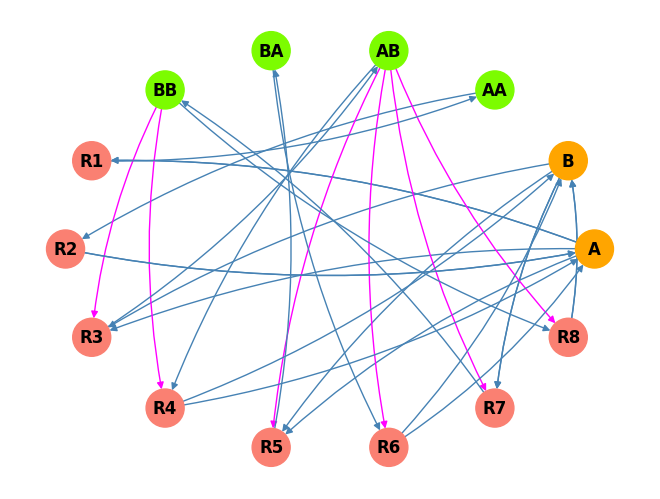

5
----


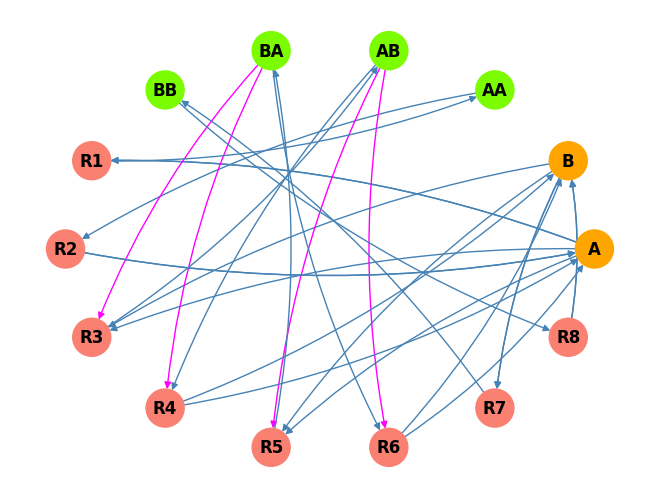

Count: 1
{}


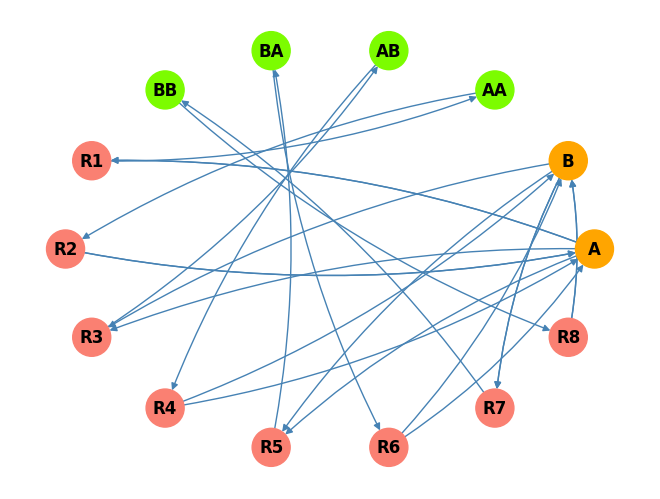

6
----


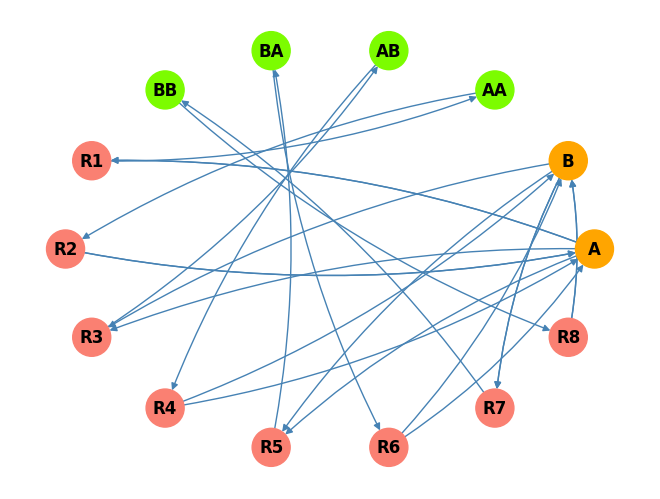

RAF: 0
Count: 0
{3: ['AB'], 4: ['AB']}
{3: ['AB'], 4: ['AB']}
yeet


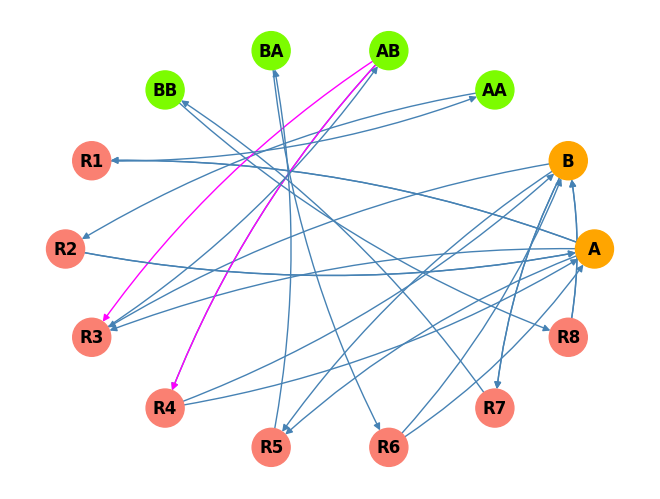

7
----


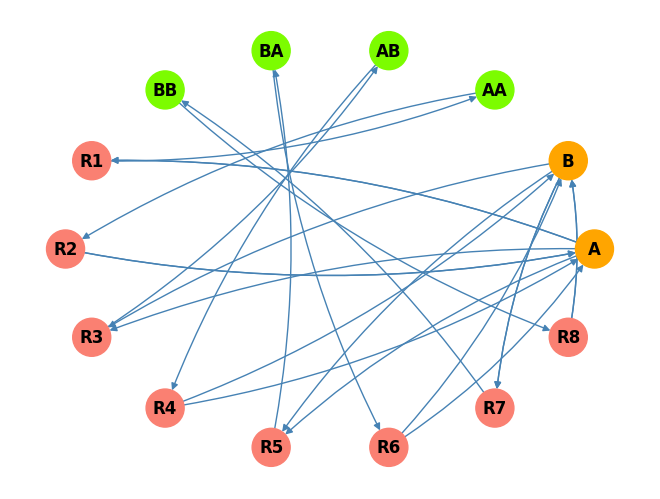

RAF: 0
Count: 0
{4: ['A'], 3: ['A']}
{4: ['A'], 3: ['A']}
yeet


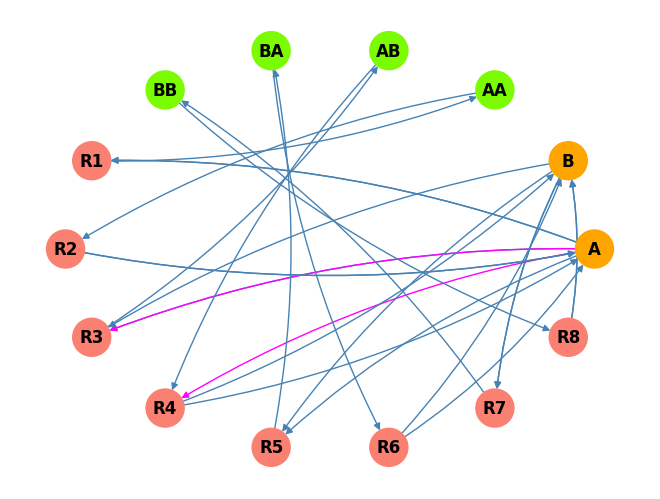

8
----


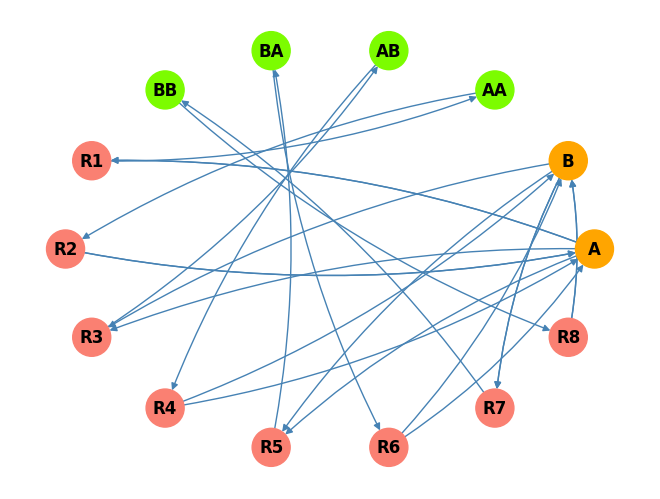

RAF: 0
Count: 0
{6: ['A'], 5: ['A']}
{6: ['A'], 5: ['A']}
yeet


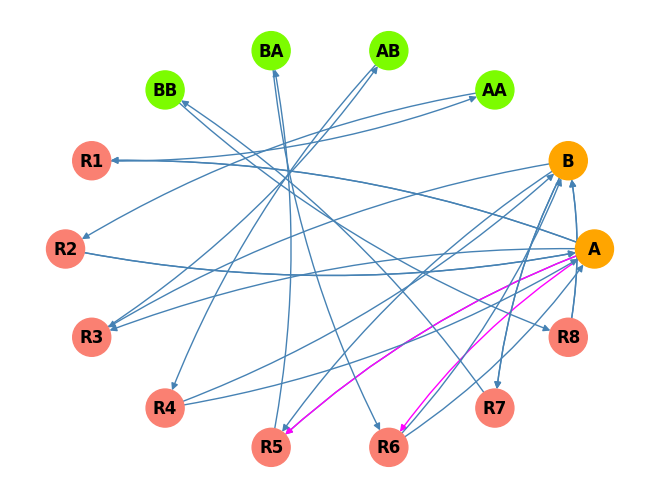

9
----


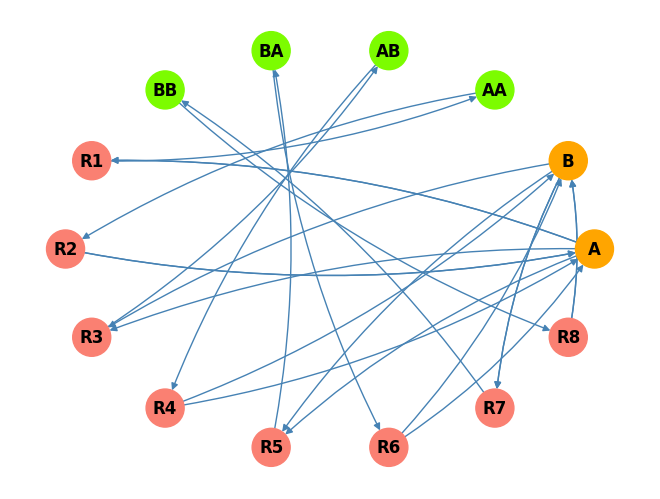

RAF: 0
Count: 0
{5: ['AB'], 6: ['AB']}
{5: ['AB'], 6: ['AB']}
yeet
RAF: 0
Count: 1
{5: ['AB', 'AA'], 6: ['AB', 'AA']}
{5: ['AB', 'AA'], 6: ['AB', 'AA']}
yeet
RAF: 0
Count: 2
{5: ['AB', 'AA'], 6: ['AB', 'AA'], 2: ['BB'], 1: ['BB']}
{5: ['AB', 'AA'], 6: ['AB', 'AA'], 2: ['BB'], 1: ['BB']}
yeet
RAF: 0
Count: 3
{5: ['AB', 'AA'], 6: ['AB', 'AA'], 2: ['BB'], 1: ['BB'], 7: ['AA'], 8: ['AA']}
{5: ['AB', 'AA'], 6: ['AB', 'AA'], 2: ['BB'], 1: ['BB'], 7: ['AA'], 8: ['AA']}
yeet


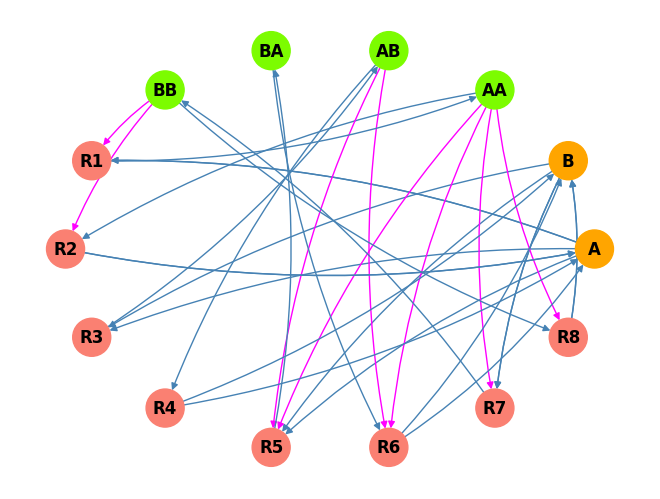

10 Trials of n = 2 at f = 0.1
----------------------
Percentage RAF: 0.3
Average Perturbations to Disrupt RAF: 1.0
Standard Deviation of Perturbations to Disrupt RAF: 0.0
Average Perturbations to Produce RAF: 2.2857142857142856
Standard Deviation of Perturbations to Produce RAF: 1.1605769149479943



In [54]:
s,f = stability_count(10, 0.1, 2)

In [ ]:
s

In [47]:
def stability_test_count (N, f, n, t=2):
    #success_stability = 0
    #failure_stability = 0
    RAFs = 0
    success_counts = []
    failure_counts = []

    if n == 2:
        t = 1


    for j in tqdm(range(N)):
        X,F,R = create_XFR(n, t)
        p = f/len(R)
        C = create_catalysts(X, len(R),p)
        

        raf = RAF(X.copy(), F.copy(), R.copy(), C)
        RAFs += raf
        if raf ==1:
            count = 0
            while raf == 1:
                #print("C:{}".format(C))
                
                new_C = remove_catalyst(C)
                #print("New C:{}".format(new_C))
                if new_C:
                    raf = RAF(X.copy(),F.copy(),R.copy(),new_C)
                    count += 1
                    C = new_C.copy()
                    #success_stability += RAF(X.copy(),F.copy(),R.copy(),new_C
                else:
                    count += 1
                    break
            success_counts.append(count)
        else:
            count = 0
            while raf != 1:
                #print("C:{}".format(C))
                new_C = add_catalyst(X.copy(),R.copy(), C)
                #print("New C:{}".format(new_C))
        
                raf = RAF(X.copy(),F.copy(),R.copy(),new_C)
                C = new_C.copy()
                count += 1
                    #success_stability += RAF(X.copy(),F.copy(),R.copy(),new_C)
            failure_counts.append(count)
            #print("R:{}".format(R))
            #new_C = add_catalyst(X.copy(),R.copy(), C)
            #failure_stability += RAF(X,F,R,new_C)

    print("{} Trials of n = {} at f = {}".format(N, n, f))
    print("----------------------")
    print("Percentage RAF: {}".format(RAFs/N))
    print("Avg # Perturbation of Stable: {}".format(np.mean(success_counts)))
    print("Stdev # Perturbation of Stable: {}".format(np.std(success_counts)))
    print("Avg # Perturbation of Unstable: {}".format(np.mean(failure_counts)))
    print("Stdev # Perturbation of Unstable: {}".format(np.std(failure_counts)))
    print("")

    fig, ax = plt.subplots(figsize =(10, 7))
    ax.hist(success_counts, color = "green", label = "Perturbations of RAF ({})".format(RAFs))
    plt.title("Perturbations of RAF ({})".format(RAFs))
    plt.show()

    fig, ax = plt.subplots(figsize =(10, 7))
    ax.hist(failure_counts, color = "orange", label= "Perturbations of Non-RAF ({})".format(N-RAFs))
    plt.title("Perturbations of Non-RAF ({})".format(N-RAFs))
    plt.show()

    return

100%|██████████| 100/100 [00:00<00:00, 2619.85it/s]


100 Trials of n = 2 at f = 0.1
----------------------
Percentage RAF: 0.15
Avg # Perturbation of Stable: 1.2666666666666666
Stdev # Perturbation of Stable: 0.44221663871405337
Avg # Perturbation of Unstable: 2.1176470588235294
Stdev # Perturbation of Unstable: 1.3408668373229784

[1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1]


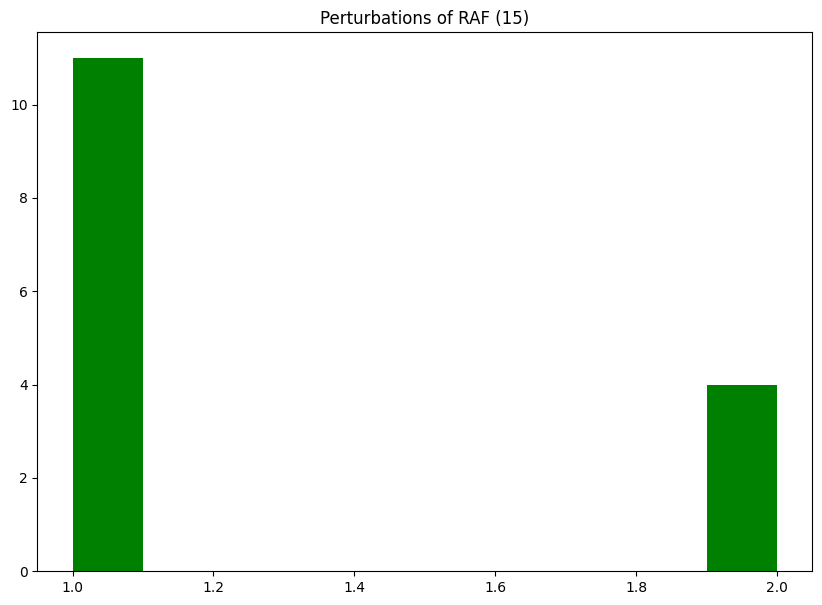

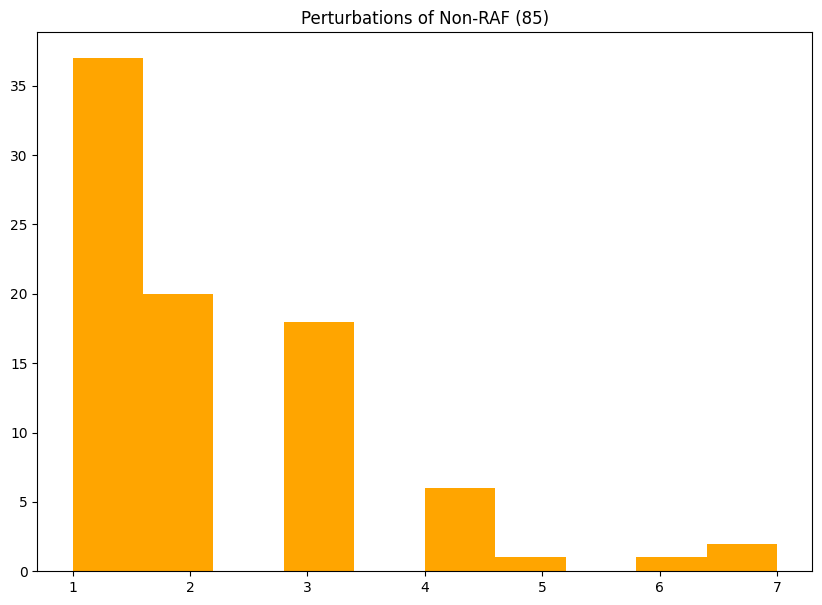

In [48]:
stability_test_count(100, 0.1,2)

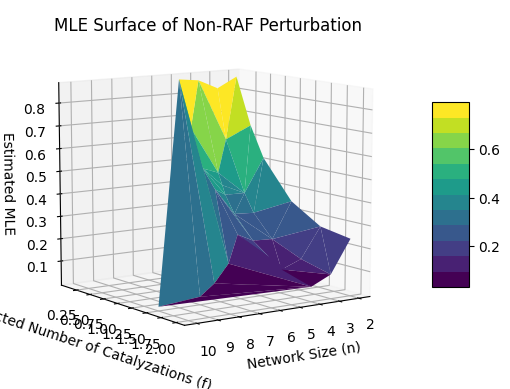

In [ ]:
from matplotlib import cm
non_raf = pd.read_csv("Data/RAF_Perturbations_MLE.csv")


fig = plt.figure()
ax = plt.axes(projection='3d')
t = ax.plot_trisurf(non_raf.n, non_raf.f, non_raf["Exp MLE"],cmap = cm.get_cmap('viridis', 12))
ax.set_title('MLE Surface of Non-RAF Perturbation')
ax.set_xlabel("Network Size (n)")
ax.set_ylabel("Expected Number of Catalyzations (f)")
ax.set_zlabel("Estimated MLE")
ax.view_init(elev=10, azim=55)
fig.colorbar(t, ax = ax, shrink = 0.5, aspect = 5)
plt.show()